# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import glob # to find files

# Seaborn library for bar chart
import seaborn as sns

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


# Declaring Variables

In [2]:
path = '../input/chest-xray-pneumonia/chest_xray/'

# train directory
train_folder=path+"train/"
train_normal_dir=train_folder+"NORMAL/"
train_pneu_dir=train_folder+"PNEUMONIA/"
# test directory
test_folder=path+"test/"
test_normal_dir=test_folder+"NORMAL/"
test_pneu_dir=test_folder+"PNEUMONIA/"
# validation directory
val_folder=path+"val/"
val_normal_dir=val_folder+"NORMAL/"
val_pneu_dir=val_folder+"PNEUMONIA/"

# variables for image size
img_width=196
img_height=196

# variable for model
batch_size=64
epochs=10

print("Variable declaration completed.")


Variable declaration completed.


In [3]:
# Train Dataset
train_class_names=os.listdir(train_folder)
print("Train class names: %s" % (train_class_names))
# print("\n")

# Test Dataset
test_class_names=os.listdir(test_folder)
print("Test class names: %s" % (test_class_names))
# print("\n")

# Validation Dataset
val_class_names=os.listdir(val_folder)
print("Validation class names: %s" % (val_class_names))

Train class names: ['PNEUMONIA', 'NORMAL']
Test class names: ['PNEUMONIA', 'NORMAL']
Validation class names: ['PNEUMONIA', 'NORMAL']


# prepare data for visualization

In [4]:
# find all files, our files has extension jpeg
train_normal_cases = glob.glob(train_normal_dir + '*jpeg')
train_pneu_cases = glob.glob(train_pneu_dir + '*jpeg')

test_normal_cases = glob.glob(test_normal_dir + '*jpeg')
test_pneu_cases = glob.glob(test_pneu_dir + '*jpeg')

val_normal_cases = glob.glob(val_normal_dir + '*jpeg')
val_pneu_cases = glob.glob(val_pneu_dir + '*jpeg')

# create lists for train, test & validation cases, create labels as well
train_list = []
test_list = []
val_list = []

for x in train_normal_cases:
    train_list.append([x, "Normal"])
    
for x in train_pneu_cases:
    train_list.append([x, "Pneumonia"])
    
for x in test_normal_cases:
    test_list.append([x, "Normal"])
    
for x in test_pneu_cases:
    test_list.append([x, "Pneumonia"])
    
for x in val_normal_cases:
    val_list.append([x, "Normal"])
    
for x in val_pneu_cases:
    val_list.append([x, "Pneumonia"])

# create dataframes
train_df = pd.DataFrame(train_list, columns=['image', 'Diagnos'])
print(train_df.shape)
test_df = pd.DataFrame(test_list, columns=['image', 'Diagnos'])
print(test_df.shape)
val_df = pd.DataFrame(val_list, columns=['image', 'Diagnos'])
print(val_df.shape)

(5216, 2)
(624, 2)
(16, 2)


# Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


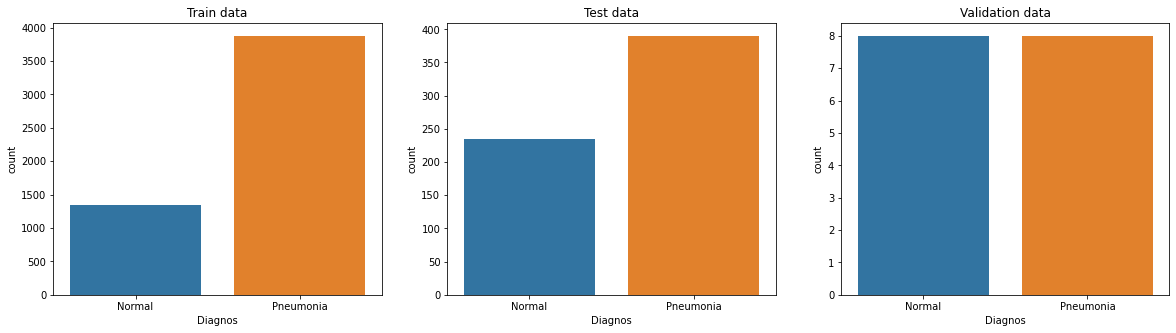

In [5]:
# plotting the Train, Test and Validation image data

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.countplot(train_df['Diagnos'])
plt.title('Train data')

plt.subplot(1,3,2)
sns.countplot(test_df['Diagnos'])
plt.title('Test data')

plt.subplot(1,3,3)
sns.countplot(val_df['Diagnos'])
plt.title('Validation data')

plt.show()


# Plotting raw images

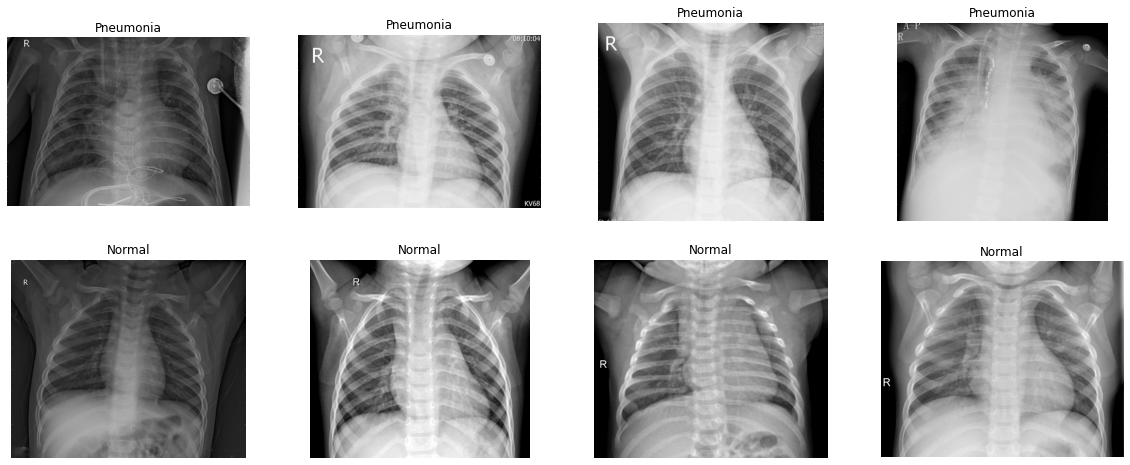

In [6]:
plt.figure(figsize=(20,8))
for i,img_path in enumerate(train_df[train_df['Diagnos'] == "Pneumonia"][0:4]['image']):
    plt.subplot(2,4,i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Pneumonia')
    
for i,img_path in enumerate(train_df[train_df['Diagnos'] == "Normal"][0:4]['image']):
    plt.subplot(2,4,4+i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Normal')

# Preparing training image data

In [7]:
# Declaring variables
x=[] # to store array value of the images
y=[] # to store the labels of the images

for folder in os.listdir(train_folder):
    image_list=os.listdir(train_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(train_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))
        
        # Converting to arrary
        img=image.img_to_array(img)
        
        # Transfer Learning: this is to apply preprocess of VGG16 model to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step
        
        # Appending the arrarys
        x.append(img) # appending image array
        y.append(train_class_names.index(folder)) # appending class index to the array
        
print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


In [8]:
# Preparing validation images data (image array and class name) for processing

# Declaring variables
val_images=[]
val_images_Original=[]
val_image_label=[] # to store the labels of the images

for folder in os.listdir(val_folder):
    image_list=os.listdir(val_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(val_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        val_images_Original.append(img.copy())
        
        # Transfer Learning: this is to apply preprocess of VGG16 to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step
        
        # Appending arrays
        val_images.append(img) # appending image array
        val_image_label.append(val_class_names.index(folder))
        
print("Preparing Validation Dataset Completed.")

Preparing Validation Dataset Completed.


In [9]:
# Declaring variables
test_images=[]
test_images_Original=[]
test_image_label=[] # to store the labels of the images

for folder in os.listdir(test_folder):
    image_list=os.listdir(test_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(test_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        test_images_Original.append(img.copy())
        
        # Transfer Learning: this is to apply preprocess of VGG16 to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step
        
        # Appending arrays
        test_images.append(img) # appending image array
        test_image_label.append(test_class_names.index(folder))
        
print("Preparing Test Dataset Completed.")


Preparing Test Dataset Completed.


# Verfying the data

In [10]:
# Training Dataset
print("Training Dataset:")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# ===========

# Test Dataset
print("Test Dataset:")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# ===========

# Validation Dataset
print("Validation Dataset:")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset:
(5216, 196, 196, 3)
(5216, 2)
Test Dataset:
(624, 196, 196, 3)
(624, 2)
Validation Dataset:
(16, 196, 196, 3)
(16, 2)


# Building a model

In [11]:
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
input_layer=layers.Input(shape=(img_width,img_height,3))
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 196, 196, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 196, 196, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 196, 196, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 98, 98, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 98, 98, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 98, 98, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 49, 49, 128)       0     

In [13]:
last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer to the final output layer
output_layer=layers.Dense(2,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 196, 196, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 196, 196, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 196, 196, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 98, 98, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 98, 98, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 98, 98, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 49, 49, 128)       0     

In [14]:
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False

We are making all the layers intrainable except the last layer. 



# Train the model

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")

Model compilation completed.


# Fitting the model

In [17]:
history=model.fit(xtrain,ytrain,epochs=10,batch_size=batch_size,verbose=True,validation_data=(xtest,ytest))

Epoch 1/10
66/66 [==============================] - 22s 180ms/step - loss: 3.5964 - accuracy: 0.8530 - val_loss: 0.5429 - val_accuracy: 0.9693
Epoch 2/10
66/66 [==============================] - 8s 124ms/step - loss: 0.1154 - accuracy: 0.9890 - val_loss: 0.3784 - val_accuracy: 0.9741
Epoch 3/10
66/66 [==============================] - 8s 124ms/step - loss: 0.0505 - accuracy: 0.9926 - val_loss: 0.3471 - val_accuracy: 0.9751
Epoch 4/10
66/66 [==============================] - 8s 127ms/step - loss: 0.0285 - accuracy: 0.9956 - val_loss: 0.2975 - val_accuracy: 0.9741
Epoch 5/10
66/66 [==============================] - 8s 125ms/step - loss: 0.0169 - accuracy: 0.9977 - val_loss: 0.3174 - val_accuracy: 0.9818
Epoch 6/10
66/66 [==============================] - 8s 124ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.4180 - val_accuracy: 0.9713
Epoch 7/10
66/66 [==============================] - 8s 125ms/step - loss: 0.0217 - accuracy: 0.9964 - val_loss: 0.3452 - val_accuracy: 0.9799
Epoch

In [19]:
model.save("mini.h5")

In [20]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

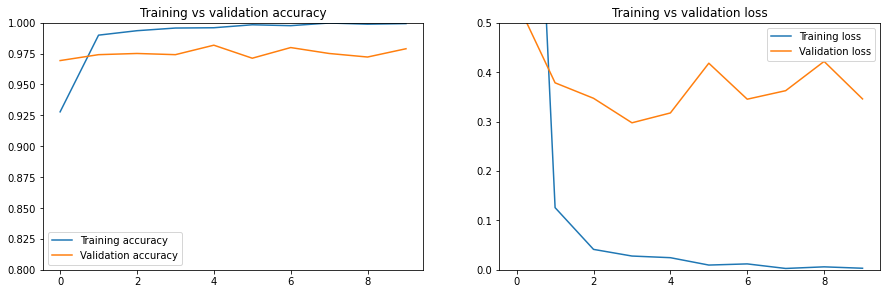

In [21]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.ylim(0.8, 1)
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.ylim(0, 0.5)
plt.legend()
plt.title("Training vs validation loss")

plt.show()


In [22]:
def Get_Xray_Type(argument):
    switcher = {
        "NORMAL": "Normal",
        "PNEUMONIA": "Pneumonia",
    }
    return switcher.get(argument, "Invalid X-ray")
def predict(img_name):
    img=image.load_img(img_name,target_size=(img_width,img_height))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)
    prediction=model.predict(img.reshape(1,img_width,img_height,3))
    output=np.argmax(prediction)
    print(train_class_names[output] + ": " + Get_Xray_Type(train_claplt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.ylim(0.8, 1)
plt.legend()
plt.title("Training vs validation accuracy")

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.ylim(0.8, 1)
plt.legend()
plt.title("Training vs validation accuracy")

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.ylim(0.8, 1)
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.ylim(0, 0.5)
plt.legend()
plt.title("Training vs validation loss")

plt.show()

plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.ylim(0, 0.5)
plt.legend()
plt.title("Training vs validation loss")

plt.show()

plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.ylim(0, 0.5)
plt.legend()
plt.title("Training vs validation loss")

plt.show()
ss_names[output]))

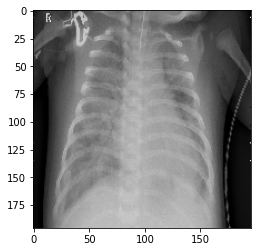

PNEUMONIA: Pneumonia


In [23]:
predict('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')

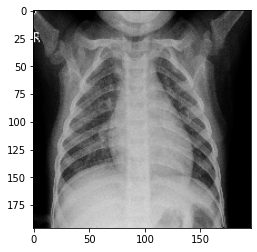

NORMAL: Normal


In [24]:
predict('../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg')

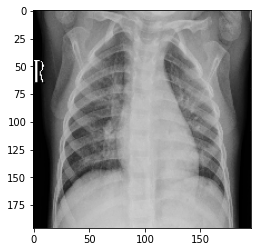

PNEUMONIA: Pneumonia


In [25]:
predict('../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg')

In [28]:
val_predictions=[]

for img in val_images:
    prediction=model.predict(img.reshape(1,img_width,img_height,3))
    output=np.argmax(prediction)
    val_predictions.append(output)

In [29]:
val_predictions

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [33]:
val_image_labels=[]
for i in val_image_label:
    val_image_labels.append(int(i[1]))
val_image_labels    

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

<AxesSubplot:>

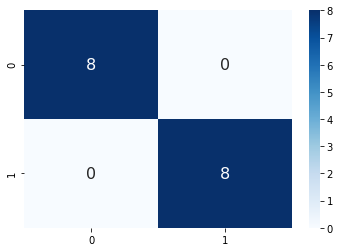

In [34]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(val_image_labels, val_predictions)
sn.heatmap(cm, annot=True,cmap="Blues", annot_kws={"size": 16})